In [1]:
library(tidyverse)

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 2.2.1     v purrr   0.2.4
v tibble  1.4.2     v dplyr   0.7.6
v tidyr   0.8.0     v stringr 1.3.0
v readr   1.1.1     v forcats 0.3.0
Warning message:
"package 'tidyr' was built under R version 3.4.4"Warning message:
"package 'dplyr' was built under R version 3.4.4"Warning message:
"package 'stringr' was built under R version 3.4.4"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


## Exercises

***Run ggplot(data = mpg). What do you see?***

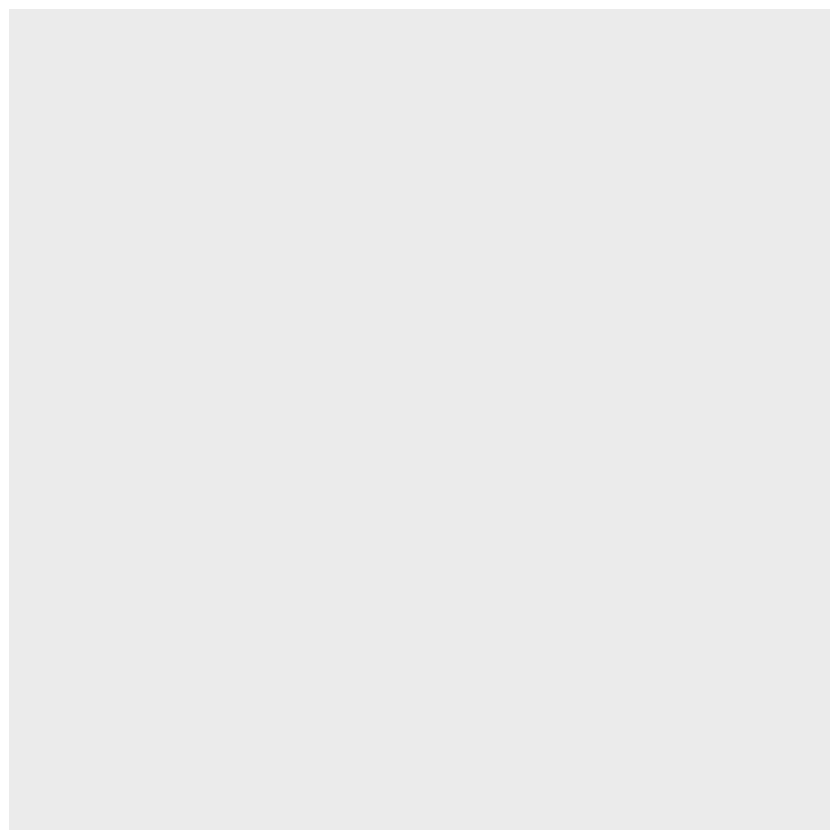

In [9]:
ggplot(data = mpg)

Only showing the ggplot coordinate system without any layers. So it is an empty graph.

***How many rows are in mtcars? How many columns?***

In [11]:
nrow(mpg)
ncol(mpg)

[1] 234

[1] 11

***What does the drv variable describe? Read the help for ?mpg to find out.***

f = front-wheel drive, r = rear wheel drive, 4 = 4wd

***Make a scatterplot of hwy versus cyl.***

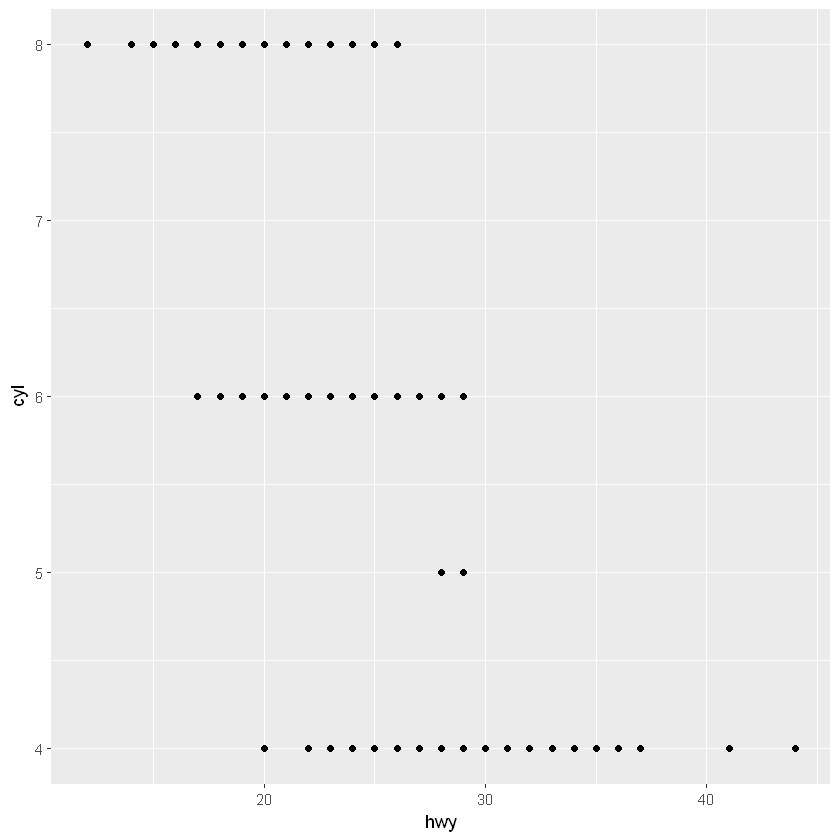

In [13]:
ggplot(data = mpg)+
    geom_point(mapping = aes(x = hwy, y = cyl))

***What happens if you make a scatterplot of class versus drv? Why is the plot not useful?***

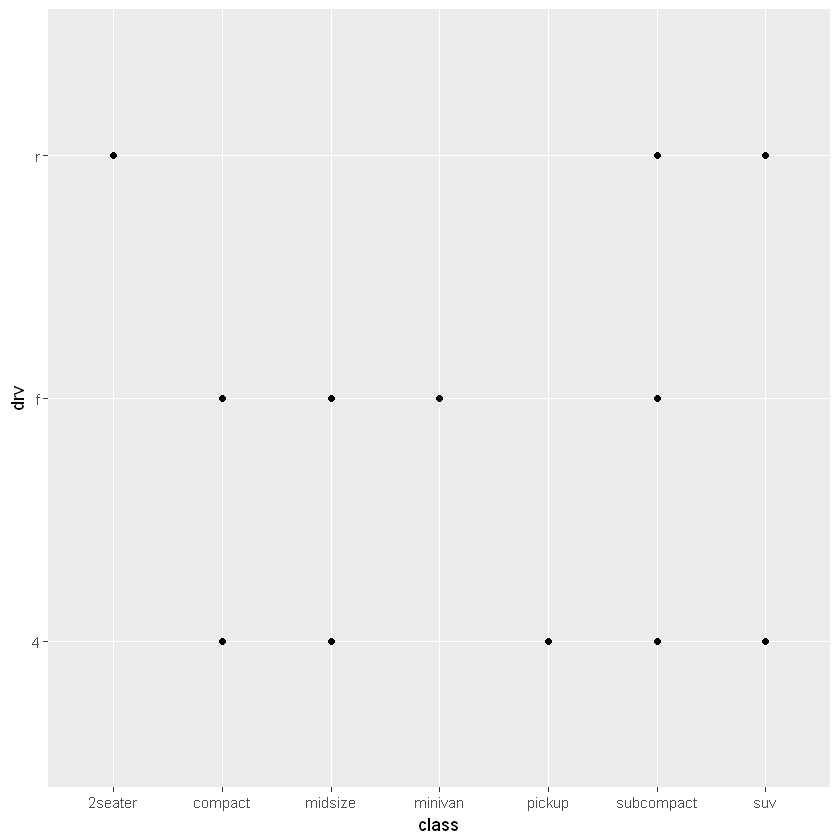

In [14]:
ggplot(data = mpg)+
    geom_point(mapping = aes(x = class, y = drv))

***What’s gone wrong with this code? Why are the points not blue? ***

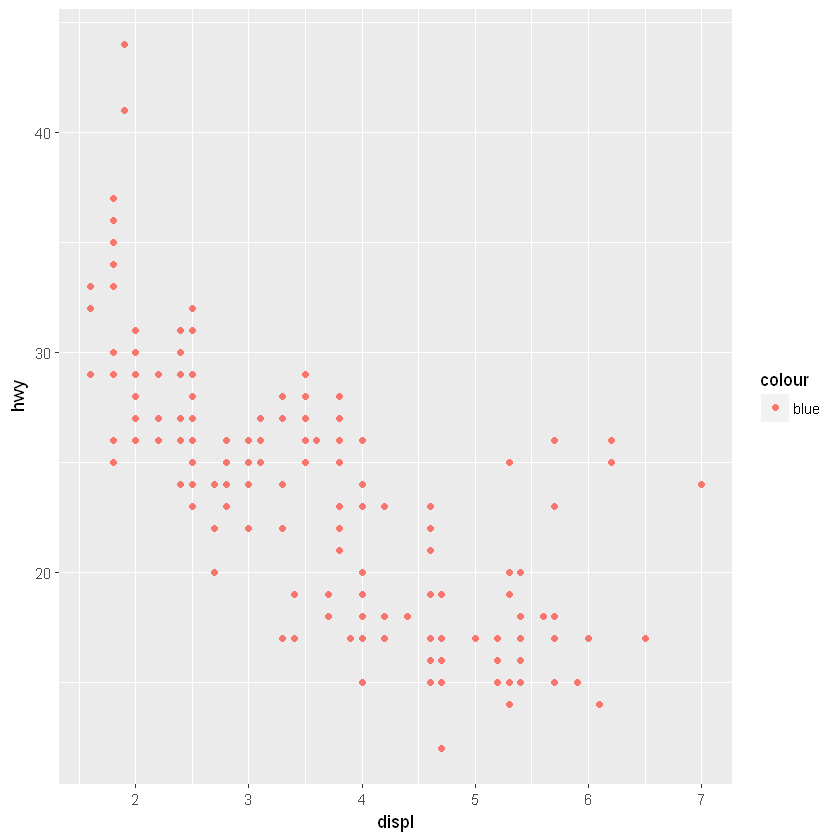

In [15]:
ggplot(data = mpg) +
  geom_point(
    mapping = aes(x = displ, y = hwy, color = "blue")
  )

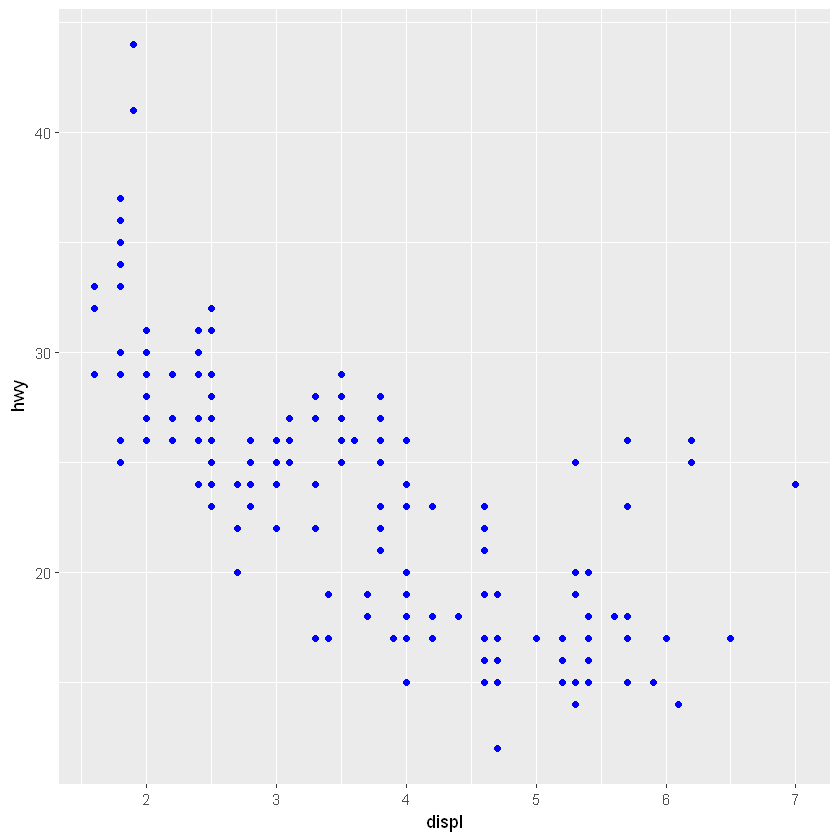

In [16]:
ggplot(data = mpg) +
  geom_point(
    mapping = aes(x = displ, y = hwy), color = "blue"
  )

To set the aesthetic to blue manually it need to be set name as an argument of your geom function, so it needs to go outside of aes().

***Which variables in mpg are categorical?
Which variables are continuous? (Hint: type ?mpg to read the documentation for the dataset.)
How can you see this information when you run mpg?***

In [20]:
str(mpg)

Classes 'tbl_df', 'tbl' and 'data.frame':	234 obs. of  11 variables:
 $ manufacturer: chr  "audi" "audi" "audi" "audi" ...
 $ model       : chr  "a4" "a4" "a4" "a4" ...
 $ displ       : num  1.8 1.8 2 2 2.8 2.8 3.1 1.8 1.8 2 ...
 $ year        : int  1999 1999 2008 2008 1999 1999 2008 1999 1999 2008 ...
 $ cyl         : int  4 4 4 4 6 6 6 4 4 4 ...
 $ trans       : chr  "auto(l5)" "manual(m5)" "manual(m6)" "auto(av)" ...
 $ drv         : chr  "f" "f" "f" "f" ...
 $ cty         : int  18 21 20 21 16 18 18 18 16 20 ...
 $ hwy         : int  29 29 31 30 26 26 27 26 25 28 ...
 $ fl          : chr  "p" "p" "p" "p" ...
 $ class       : chr  "compact" "compact" "compact" "compact" ...


***Map a continuous variable to color, size, and shape. How do these aesthetics behave differently for categorical versus continuous variables?***

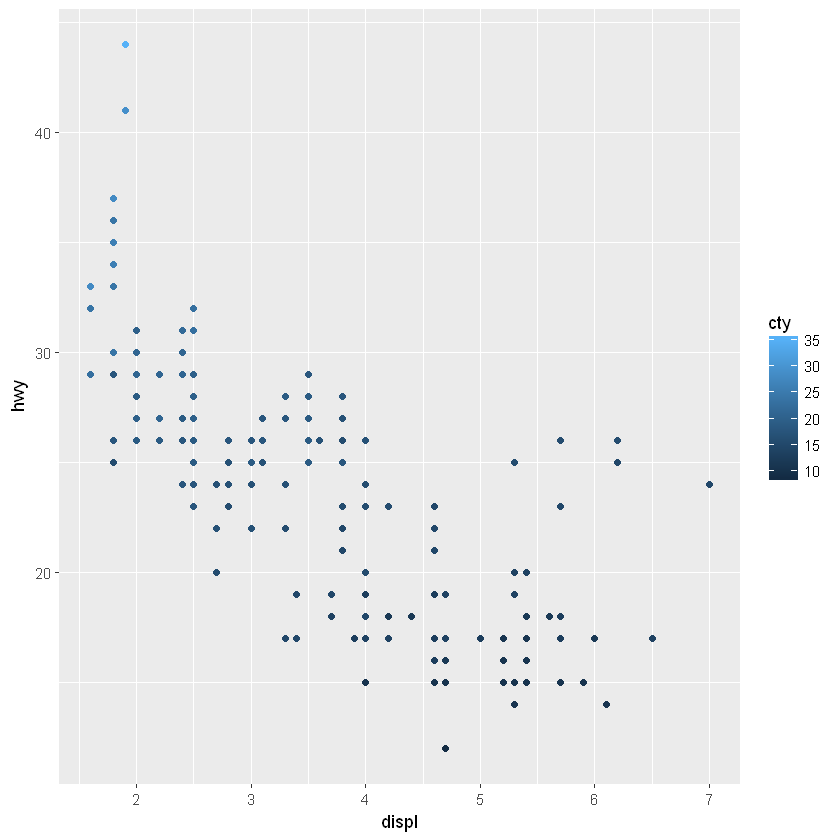

In [25]:
ggplot(data = mpg) +
  geom_point(
    mapping = aes(x = displ, y = hwy, color = cty)
  )
# A continuous variable can not be mapped to shape

***What happens if you map the same variable to multiple aesthetics?***

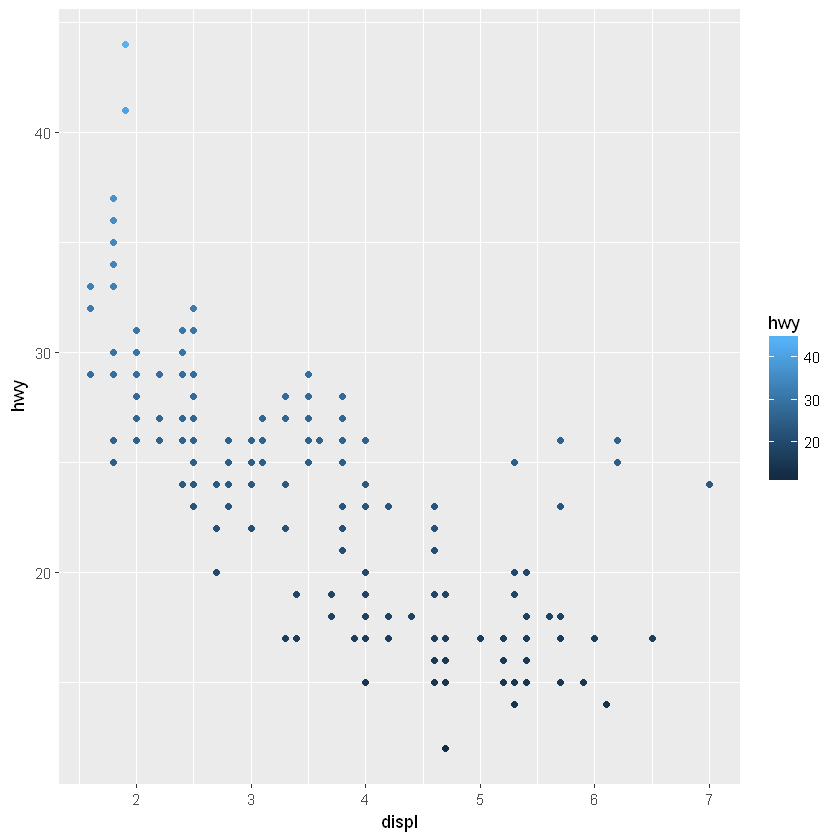

In [26]:
ggplot(data = mpg) +
  geom_point(
    mapping = aes(x = displ, y = hwy, color = hwy)
  )

***What does the stroke aesthetic do? What shapes does it work with? (Hint: use ?geom_point.)***

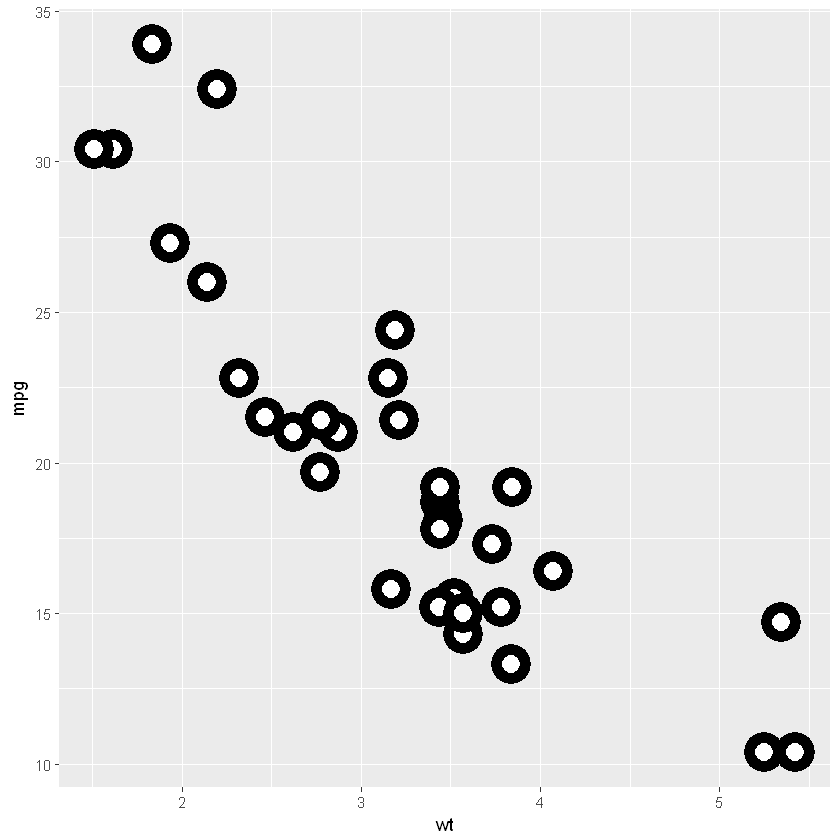

In [28]:
# For shapes that have a border (like 21), you can colour the inside and
# outside separately. Use the stroke aesthetic to modify the width of the
# border
ggplot(mtcars, aes(wt, mpg)) +
  geom_point(shape = 21, colour = "black", fill = "white", size = 5, stroke = 5)

***What happens if you map an aesthetic to something other than a variable name, like aes(color = displ < 5)?***

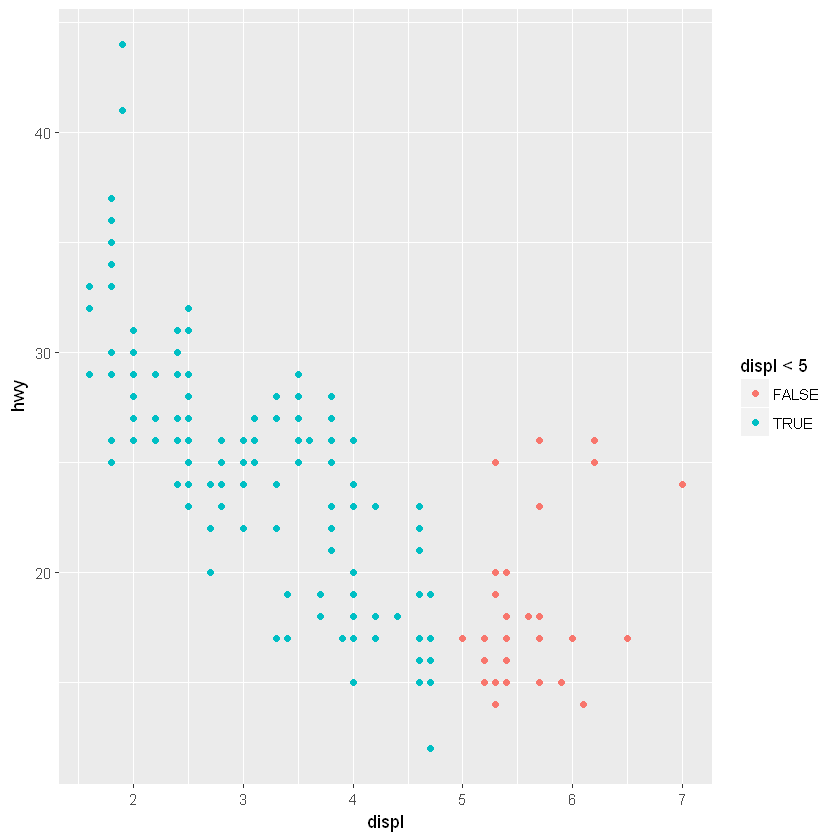

In [29]:
ggplot(data = mpg) +
  geom_point(
    mapping = aes(x = displ, y = hwy, color = displ < 5)
  )

## Facets
Subplots that each display one subset of the data
<br>facet_wrap() - To facet your plot by a single variable
<br>facet_grid() - To facet your plot on the combination of two variables

**What happens if you facet on a continuous variable?**

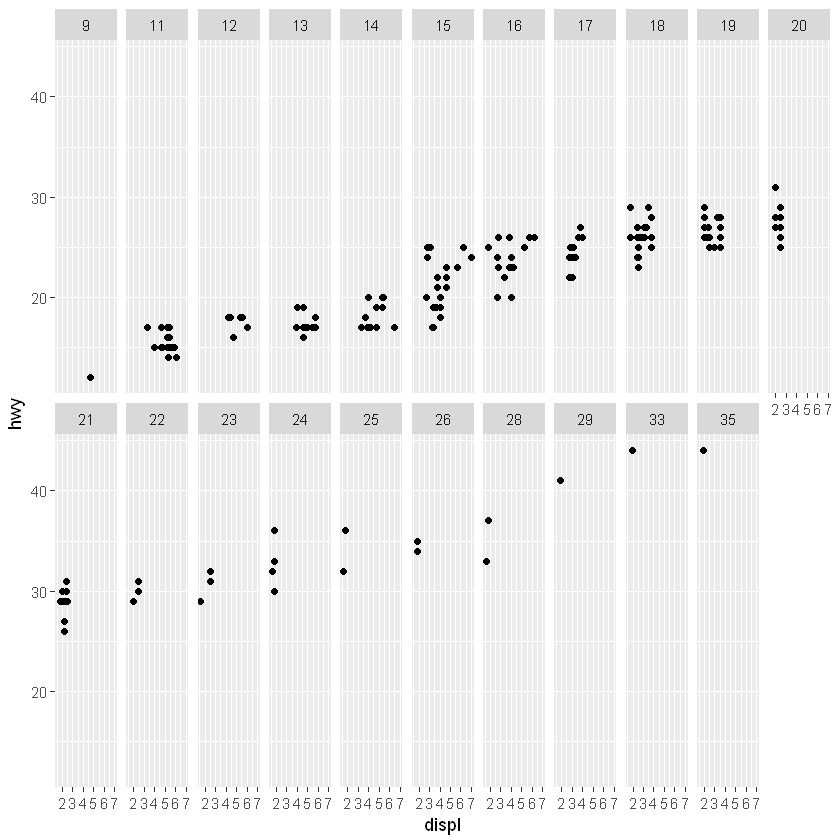

In [31]:
ggplot(data = mpg) +
  geom_point(mapping = aes(x = displ, y = hwy)) +
  facet_wrap(~ cty, nrow = 2)

**What do the empty cells in a plot with facet_grid(drv ~ cyl) mean? How do they relate to this plot?**
<br>There are no data for this combination

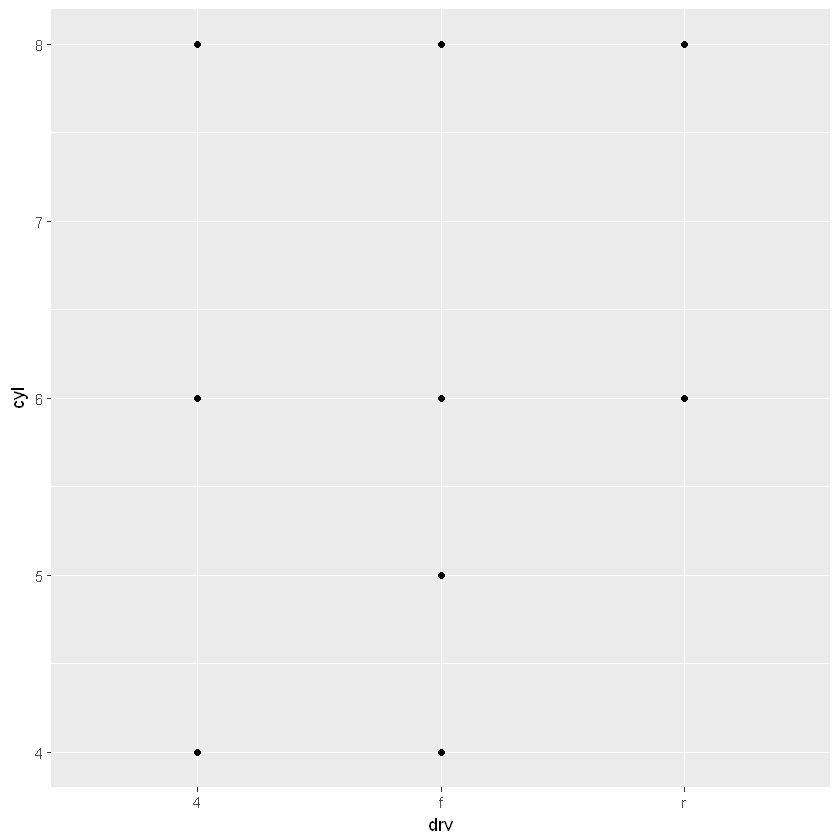

In [34]:
ggplot(data = mpg) +
    geom_point(mapping = aes(x = drv, y = cyl))

**What plots does the following code make? What does . do?**
<br>drv ~ . - facets the drv variable into rows
<br>. ~ cyl - facets the cyl variable into columns

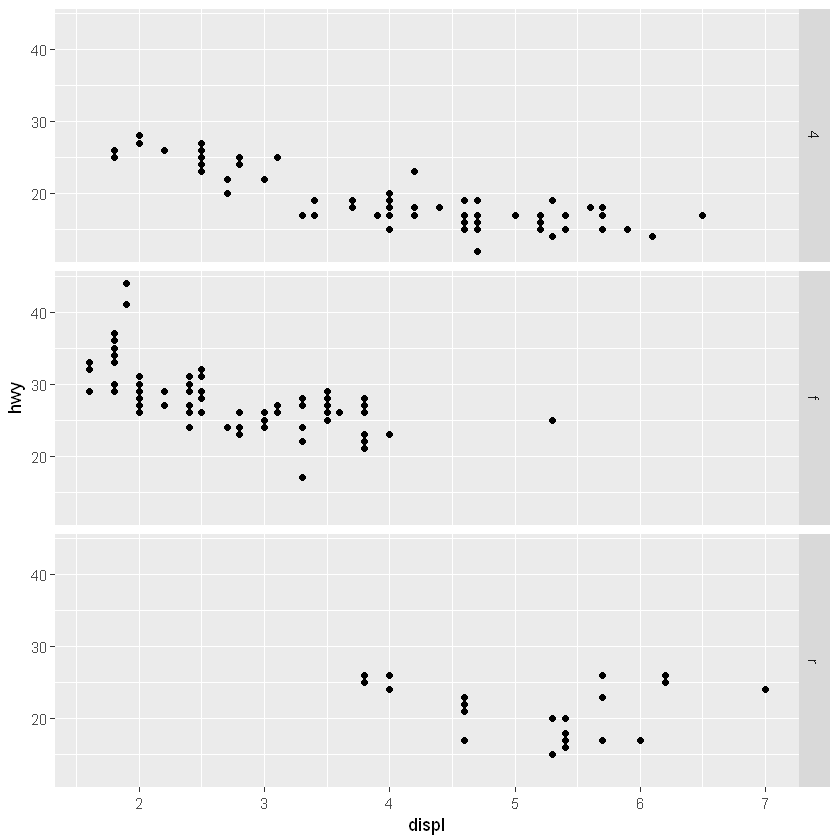

In [35]:
ggplot(data = mpg) +
  geom_point(mapping = aes(x = displ, y = hwy)) +
  facet_grid(drv ~ .)

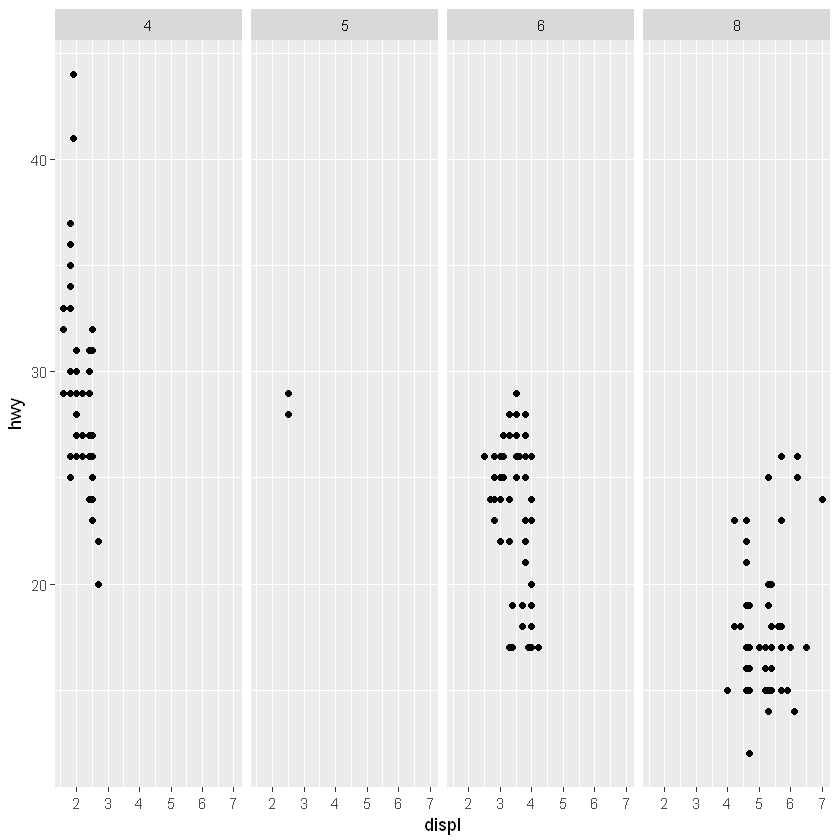

In [36]:
ggplot(data = mpg) +
  geom_point(mapping = aes(x = displ, y = hwy)) +
  facet_grid(. ~ cyl)

**Take the first faceted plot in this section:
<br>What are the advantages to using faceting instead of the color aesthetic? What are the disadvantages? How might the balance change if you had a larger dataset?**
<br>The color aesthetic shows the data all together easier to compare with small datasets. With a lot of variables faceting would better visualise specific differences that maybe the color getting to similar to each other and hard to differentiate. Also overlying datapoint can be seen in facets better than with colors.

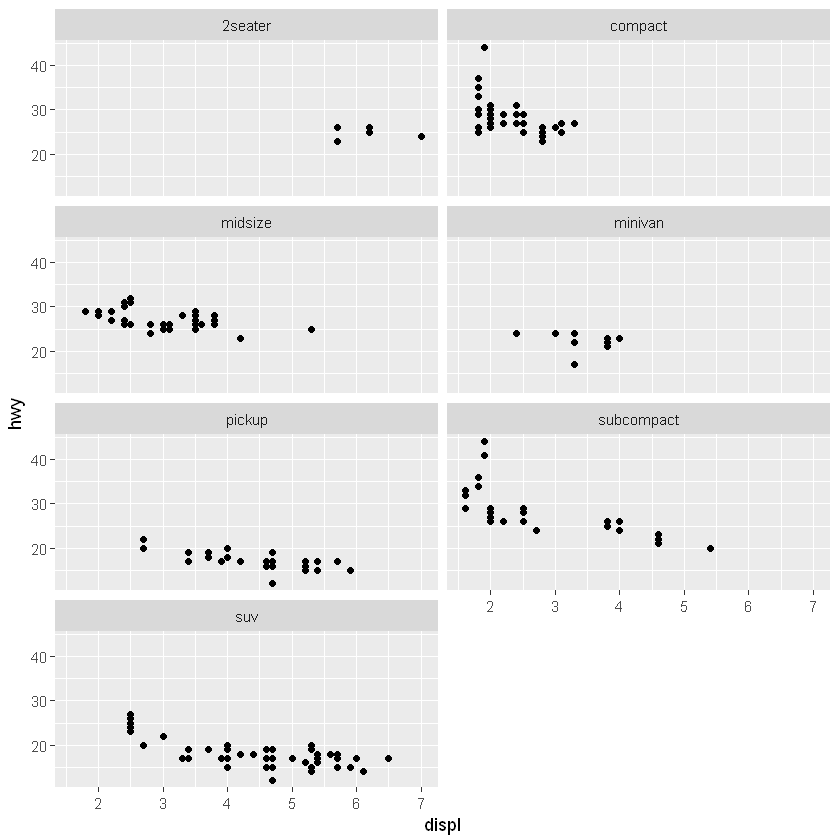

In [50]:
ggplot(data = mpg) +
  geom_point(mapping = aes(x = displ, y = hwy)) +
  facet_wrap(~ class, nrow = 4)

**Read ?facet_wrap. What does nrow do? What does ncol do? What other options control the layout of the individual panels? Why doesn’t facet_grid() have nrow and ncol variables?**
<br>nrow = number of rows the data should be visualised
<br>ncol = number of columns the data should be visualised
<br>dir = directtion horizontal or vertical
<br>facet_grip does not have this because it hast two variables and therefore these variables detemine of many colmns and rows

**When using facet_grid() you should usually put the variable with more unique levels in the columns. Why?**

Most screens are wider than they are tall.

## Geometric Objects

**What geom would you use to draw a line chart? A boxplot? A histogram? An area chart?**

line chart = geom_line()
<br>boxplot = geom_boxplot()
<br>histogram = geom_histogram()
<br>area chart = geom_area()

Run this code in your head and predict what the output will look like. Then, run the code in R and check your predictions:

`geom_smooth()` using method = 'loess'


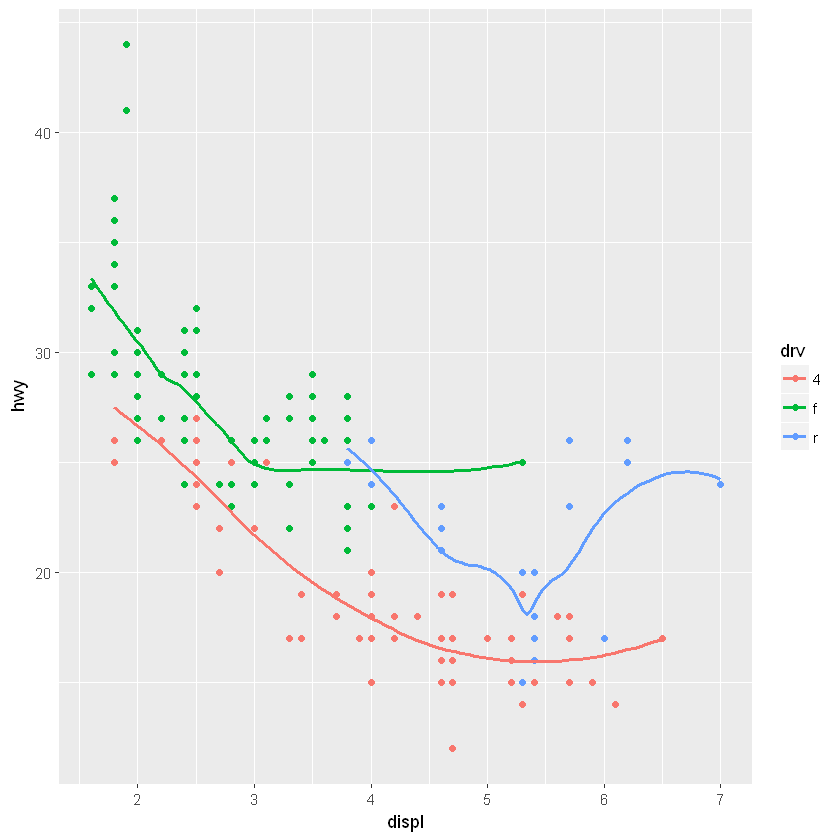

In [58]:
ggplot(
  data = mpg,
  mapping = aes(x = displ, y = hwy, color = drv)
) +
  geom_point() +
  geom_smooth(se = FALSE)

**What does show.legend = FALSE do? What happens if you remove it? Why do you think I used it earlier in the chapter?**
<br>It hides the legend. If you remove it it a legend shows up at the right corner. It was used to save space.

**What does the se argument to geom_smooth() do?**
<br>The se argument display the confidence interval around smooth

**Will these two graphs look different? Why/why not?**
<br>They will look the same. Two different types of writing the plot. First is better for readability and changes.

`geom_smooth()` using method = 'loess'


`geom_smooth()` using method = 'loess'


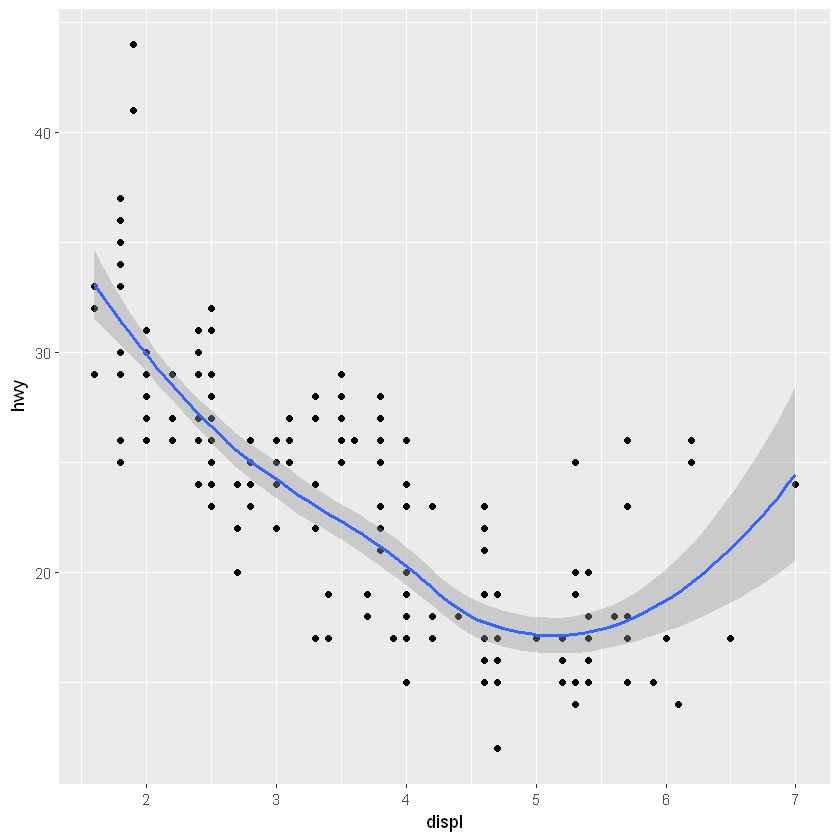

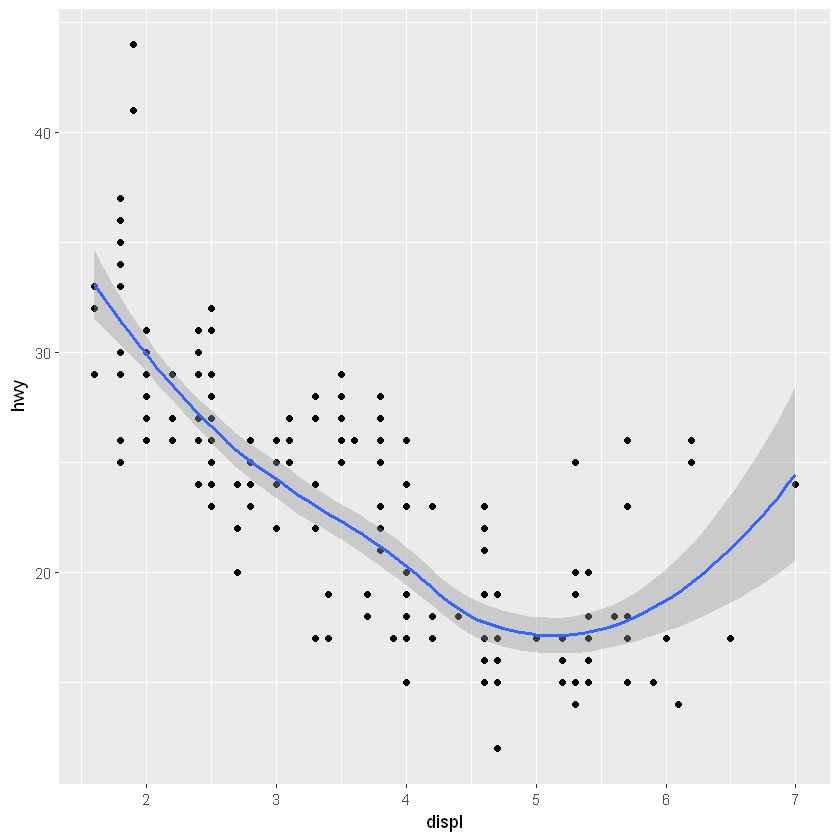

In [62]:
ggplot(data = mpg, mapping = aes(x = displ, y = hwy)) +
  geom_point() +
  geom_smooth()

ggplot() +
  geom_point(
    data = mpg,
    mapping = aes(x = displ, y = hwy)
  ) +
  geom_smooth(
    data = mpg,
    mapping = aes(x = displ, y = hwy)
  )

**Re-create the R code necessary to generate the following graphs.**

`geom_smooth()` using method = 'loess'


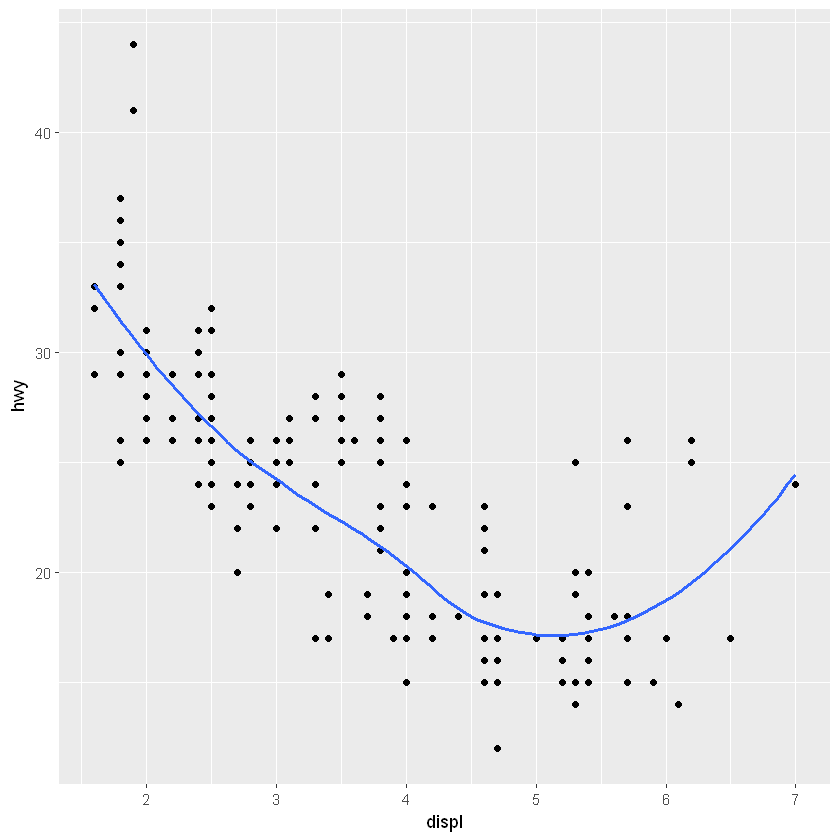

In [65]:
ggplot(data = mpg, mapping = aes(x= displ, y = hwy ))+
    geom_point()+
    geom_smooth(se = FALSE)

`geom_smooth()` using method = 'loess'


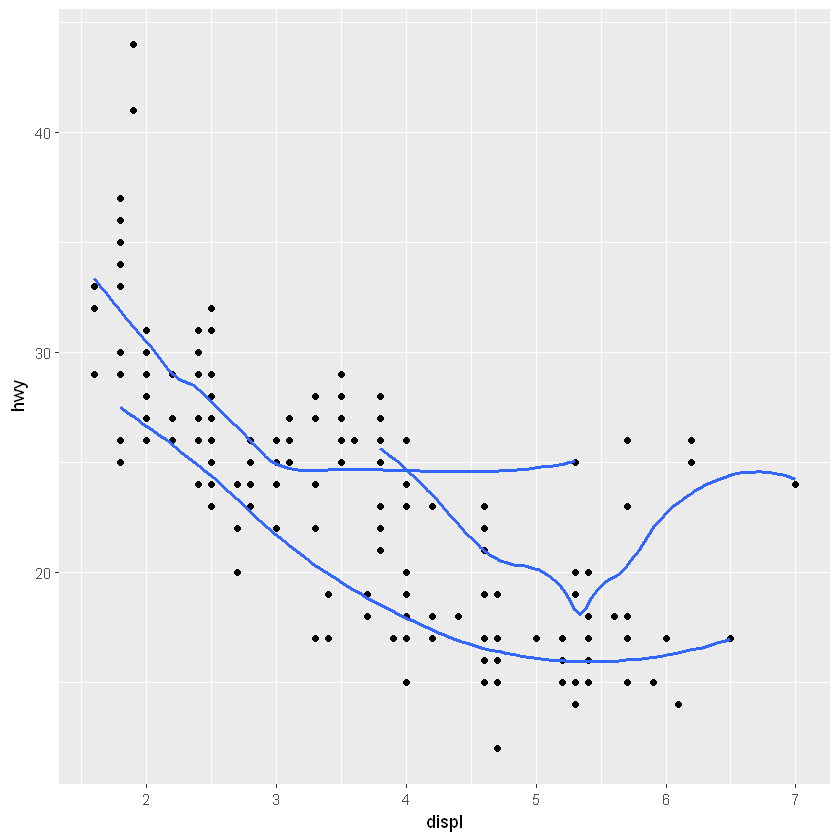

In [67]:
ggplot(data = mpg, mapping = aes(x= displ, y = hwy, group = drv ))+
    geom_point()+
    geom_smooth(se = FALSE)

`geom_smooth()` using method = 'loess'


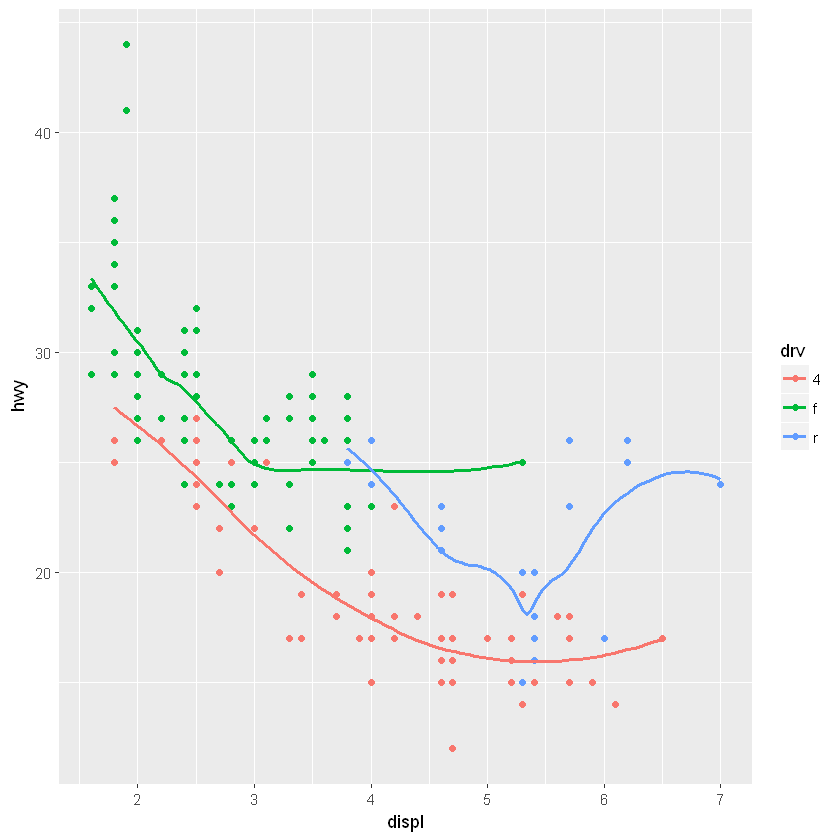

In [68]:
ggplot(data = mpg, mapping = aes(x= displ, y = hwy, color = drv ))+
    geom_point()+
    geom_smooth(se = FALSE)

`geom_smooth()` using method = 'loess'


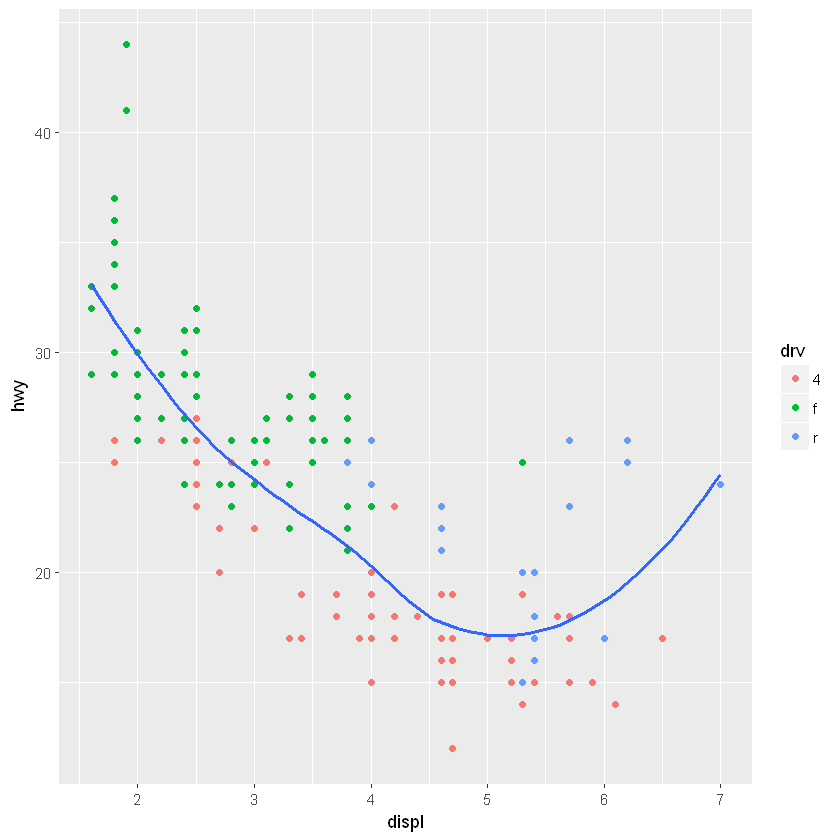

In [70]:
ggplot(data = mpg, mapping = aes(x= displ, y = hwy ))+
    geom_point(aes(color = drv))+
    geom_smooth(se = FALSE)

`geom_smooth()` using method = 'loess'


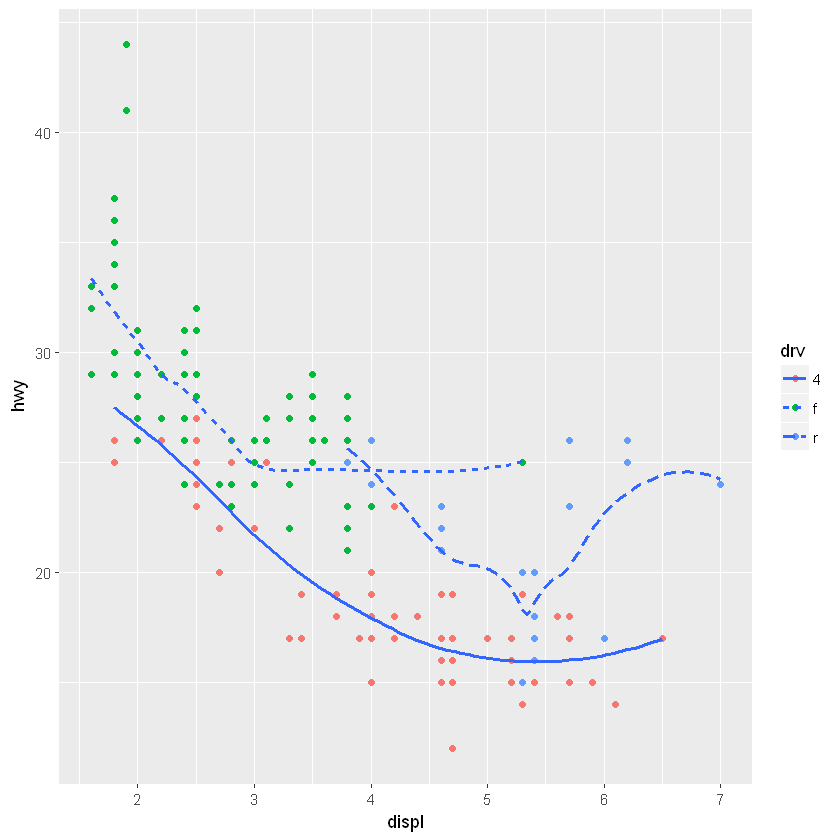

In [73]:
ggplot(data = mpg, mapping = aes(x= displ, y = hwy ))+
    geom_point(aes(color = drv))+
    geom_smooth(aes(linetype = drv),se = FALSE)

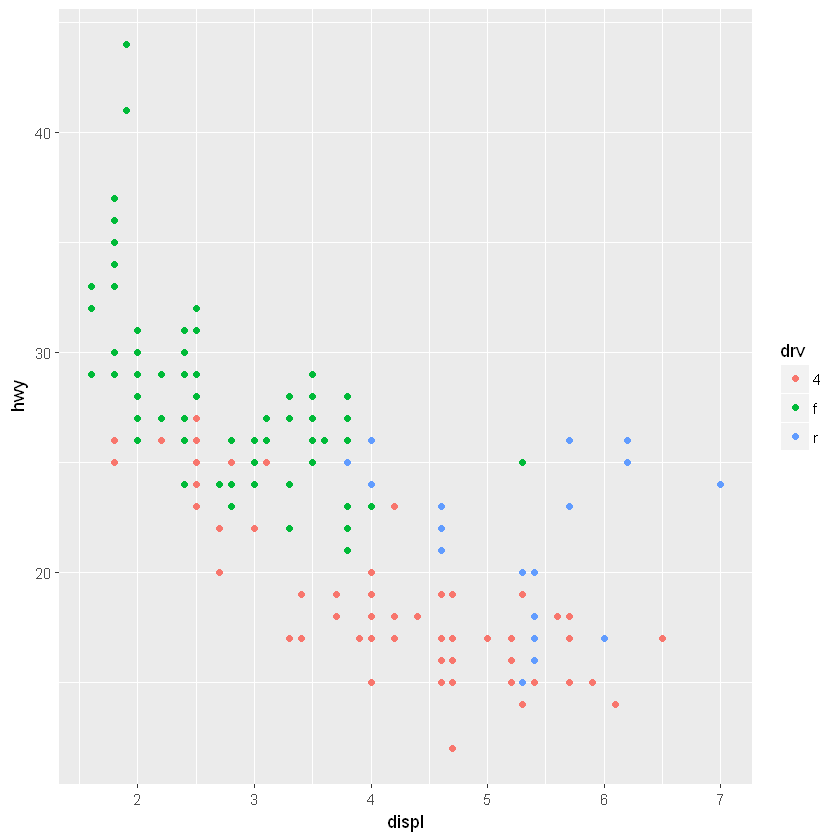

In [74]:
ggplot(data = mpg, mapping = aes(x= displ, y = hwy ))+
    geom_point(aes(color = drv))

## Statistical Transformations

Bar charts, histograms, and frequency polygons bin your data and then plot bin counts, the number of points that fall in each bin.
<br>Smoothers fit a model to your data and then plot predictions from the model.
<br>Boxplots compute a robust summary of the distribution and display a specially formatted box.


**What is the default geom associated with stat_summary()? How could you rewrite the previous plot to use that geom function instead of the stat function?**
<br>geom_histogram/geom_freqpoly is the default.

**What does geom_col() do? How is it different to geom_bar()?**
<br>There are two types of bar charts: geom_bar and geom_col, where geom_bar makes the height of the bar proportional to the number of cases in each group and geom_col uses raw data in the dataset.

**Most geoms and stats come in pairs that are almost always used in concert. Read through the documentation and make a list of all the pairs. What do they have in common?**


**What variables does stat_smooth() compute? What parameters control its behavior?**


**In our proportion bar chart, we need to set group = 1. Why? In other words what is the problem with these two graphs?**
<br>When group is not set to 1 than the proportion is calculated for each variable byitself which makes it 100%. 

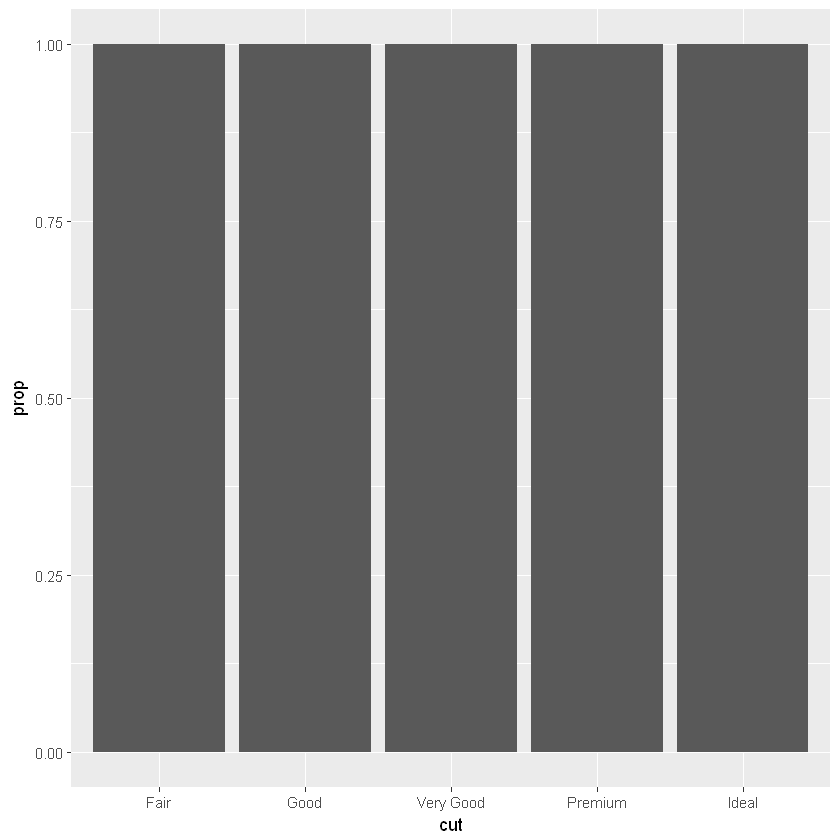

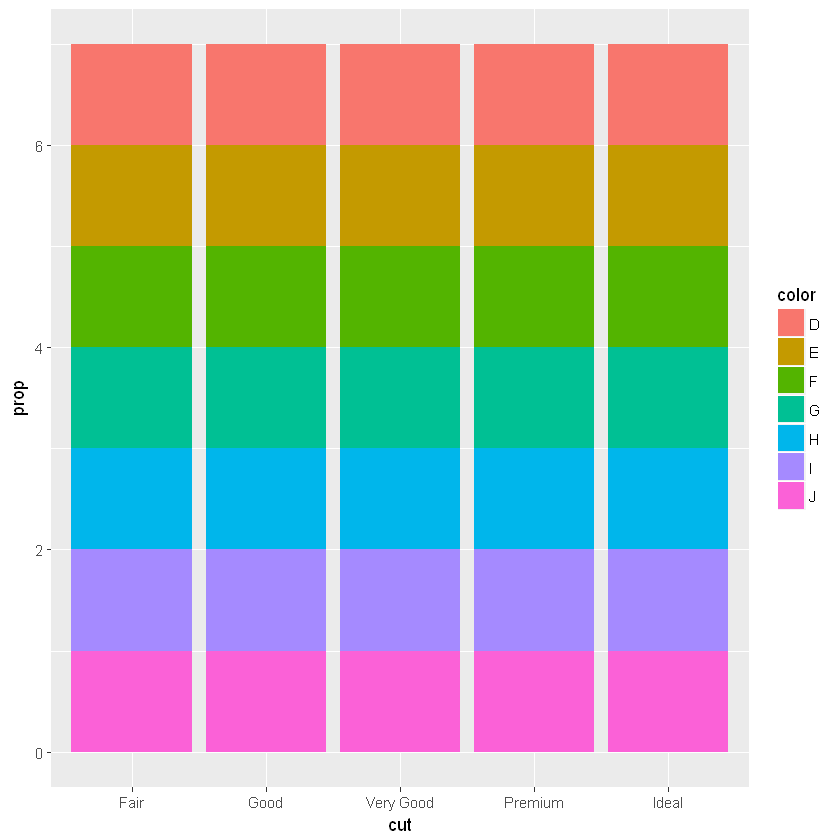

In [90]:
ggplot(data = diamonds) +
  geom_bar(mapping = aes(x = cut, y = ..prop..))
ggplot(data = diamonds) +
  geom_bar(
    mapping = aes(x = cut, fill = color, y = ..prop..)
  )

## Position Adjustments

position argument are "stack" (default),"identity", "dodge" or "fill":
<br>identify = will place each object exactly where it falls in the context of the graph. This is not very useful for bars, because it overlaps them. To see that overlapping we either need to make the bars slightly transparent by setting alpha to a small value, or completely transparent by setting fill = NA
<br>fill =  works like stacking, but makes each set of stacked bars the same height. This makes it easier to compare proportions across groups
<br>dodge = places overlapping objects directly beside one another. This makes it easier to compare individual values

overplotting = espeacially scattlerplot
<br>You can avoid this gridding by setting the position adjustment to âjitter.â position = "jitter" adds a small amount of random noise to each point. This spreads the points out because no two points are likely to receive the same amount of random noise. geom_point(position = "jitter"): geom_jitter().

**What is the problem with this plot? How could you improve it?**

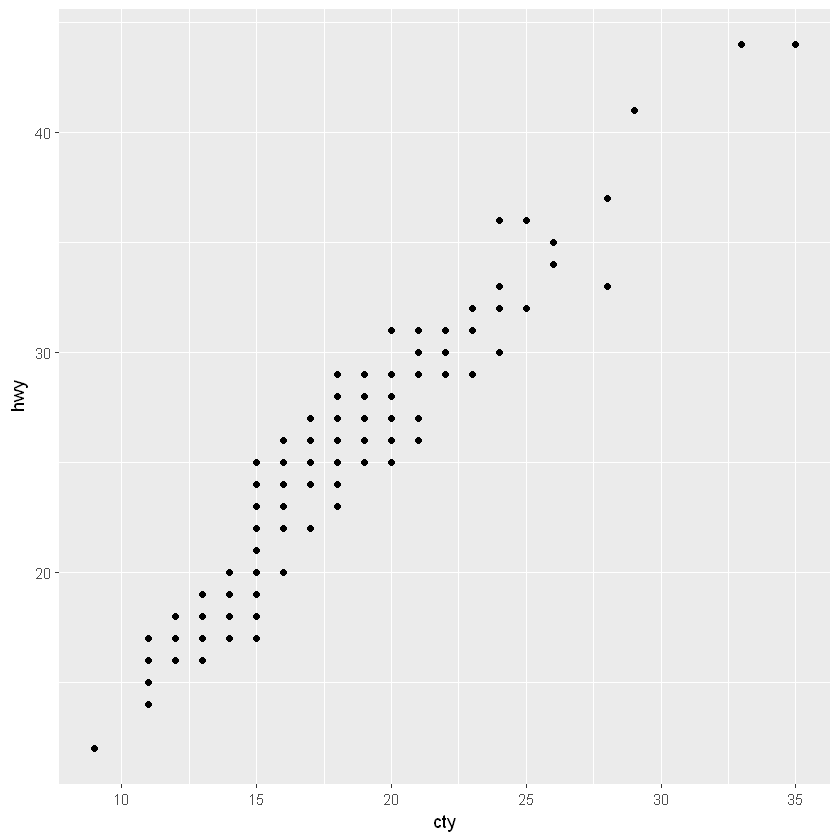

In [94]:
ggplot(data = mpg, mapping = aes(x = cty, y = hwy)) +
  geom_point()

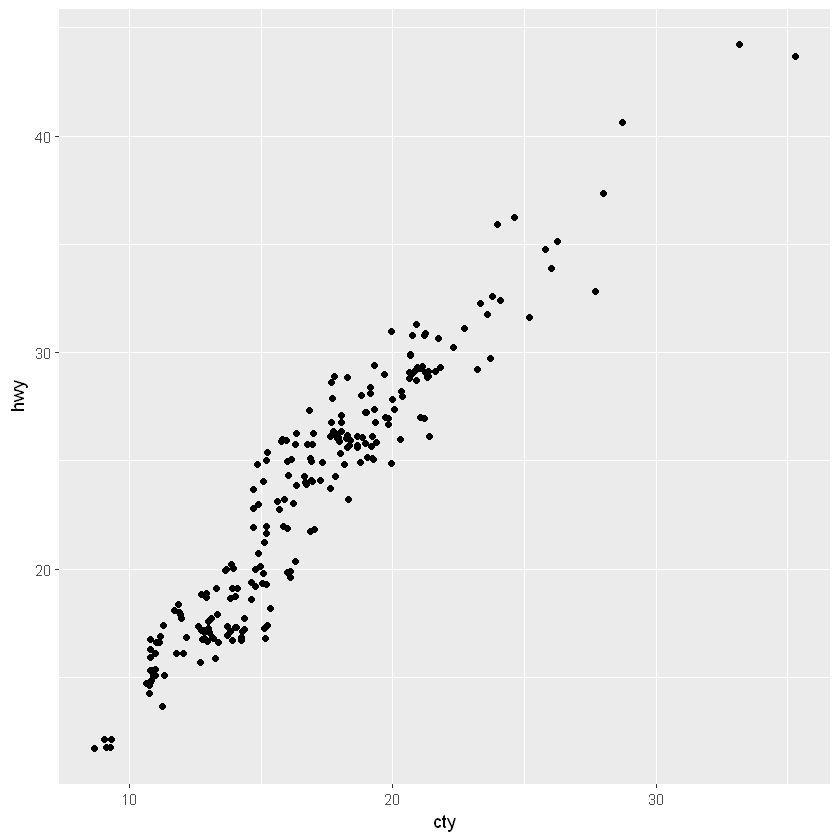

In [95]:
ggplot(data = mpg, mapping = aes(x = cty, y = hwy)) +
  geom_jitter()

**What parameters to geom_jitter() control the amount of jittering?**
<br>width and height for vertical and horizontal jitter

**Compare and contrast geom_jitter() with geom_count().**
<br>geom_count as seen below shows the number of observations with point size. It is maybe useful to see if jittering is needed.

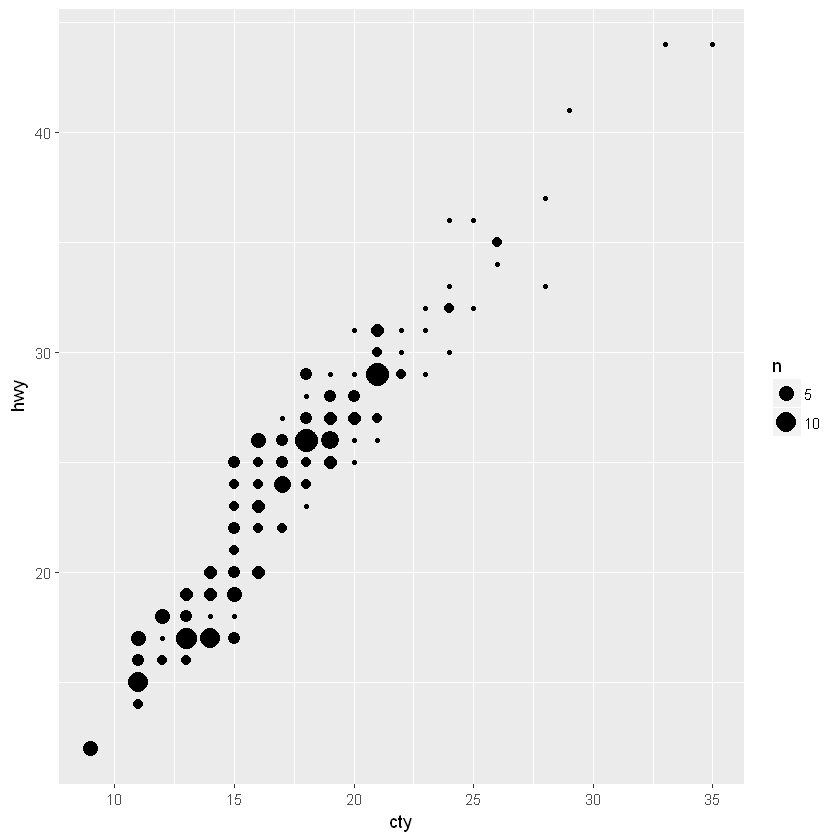

In [97]:
ggplot(data = mpg, mapping = aes(x = cty, y = hwy)) +
  geom_count()

**Whatâs the default position adjustment for geom_boxplot()? Create a visualization of the mpg dataset that demonstrates it.**
<br>position dodge is the default

In [103]:
?geom_boxplot()

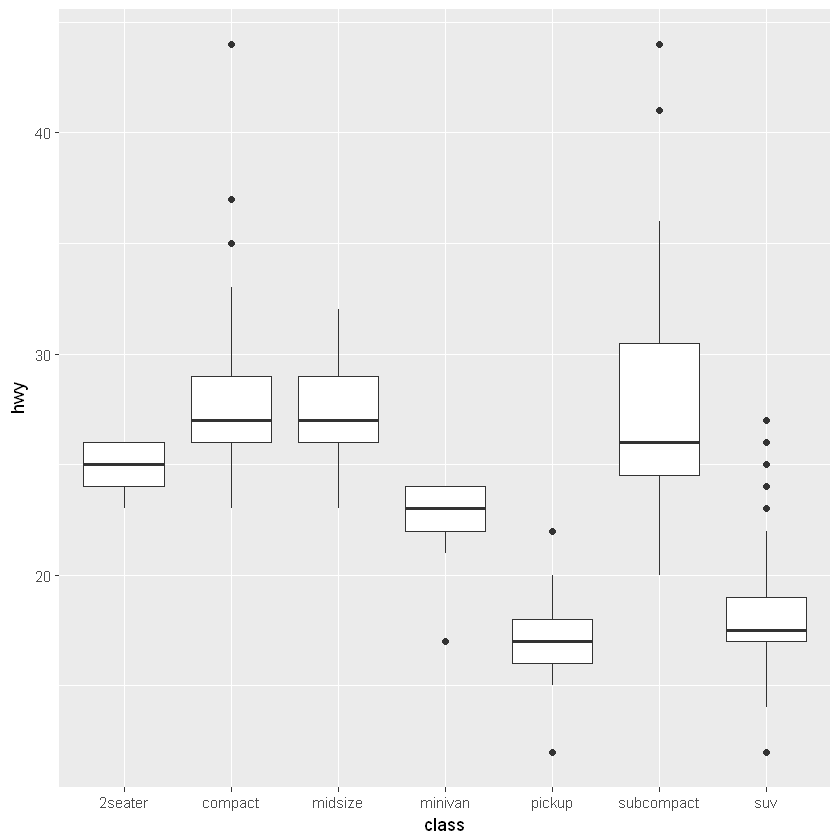

In [104]:
ggplot(data = mpg, mapping = aes(x = class, y = hwy)) +
  geom_boxplot()

## Coordinate Systems

The default coordinate system is the Cartesian coordinate system where the x and y position act independently to find the location of each point.
<br>coord_flip() switches the x- and y-axes. This is useful (for example) if you want horizontal boxplots. Itâs also useful for long labelsâitâs hard to get them to fit without overlapping on the x-axis
<br>coord_quickmap() sets the aspect ratio correctly for maps. This is very important if youâre plotting spatial data with ggplot2
<br>coord_polar() uses polar coordinates. Polar coordinates reveal an interesting connection between a bar chart and a Coxcomb chart

**Turn a stacked bar chart into a pie chart using coord_polar()**

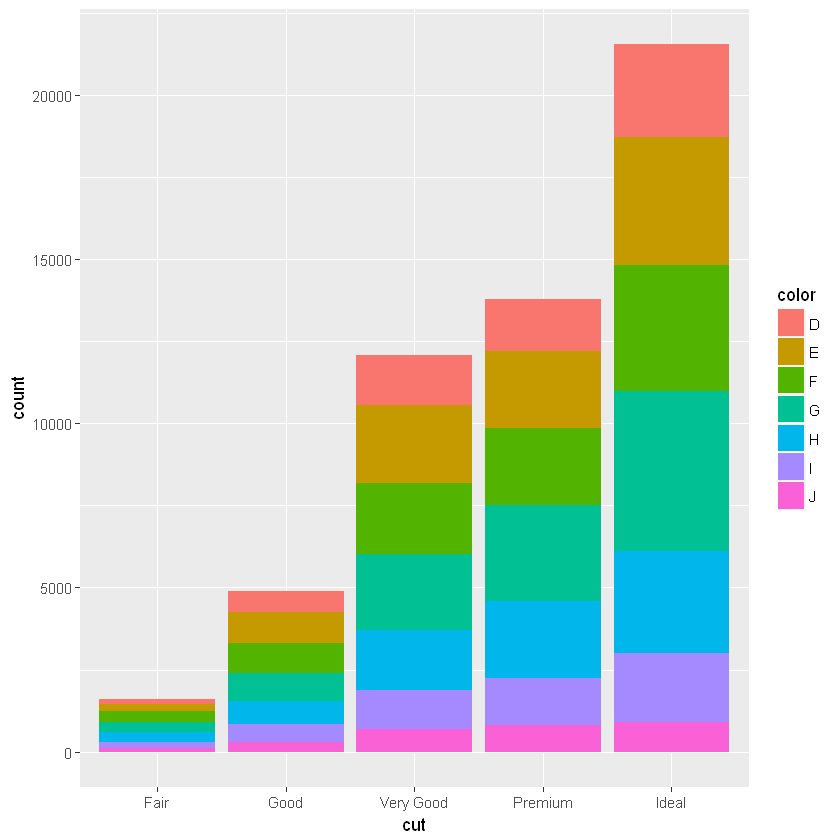

In [117]:
ggplot(data = diamonds) +
  geom_bar(
    mapping = aes(x = cut, fill = color)
  )

**What does labs() do? Read the documentation.**
<br>Modifies axis, legend, and plot labels

**Whatâs the difference between coord_quickmap() and coord_map()?**
<br>coord_map projects a portion of the earth, which is approximately spherical, onto a flat 2D plane using any projection defined by the mapproj package. Map projections do not, in general, preserve straight lines, so this requires considerable computation. coord_quickmap is a quick approximation that does preserve straight lines. It works best for smaller areas closer to the equator. 

**What does the following plot tell you about the relationship between city and highway mpg? Why is coord_fixed() important? What does geom_abline() do?**
<br>geom_abline provides and reference lines to a plot, either horizontal, vertical, or diagonal (specified by slope and intercept).
<br>coord_fixed = A fixed scale coordinate system forces a specified ratio between the physical representation of data units on the axes. The ratio represents the number of units on the y-axis equivalent to one unit on the x-axis. The default, ratio = 1

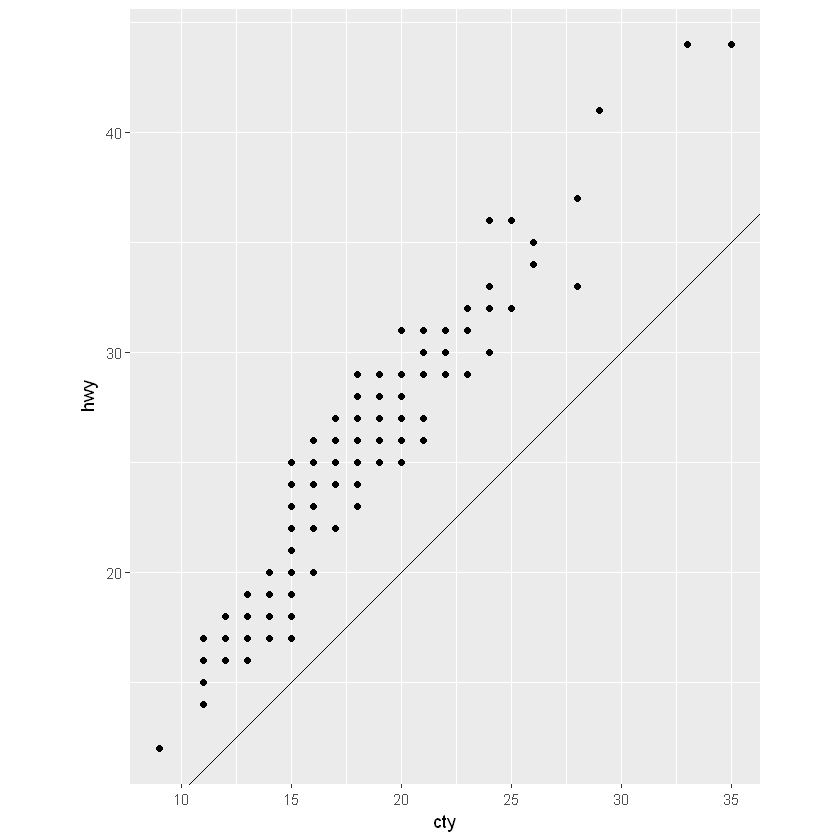

In [128]:
ggplot(data = mpg, mapping = aes(x = cty, y = hwy)) +
  geom_point() +
  geom_abline()+
    coord_fixed()